# Tensorflow Project Exercise

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('bank_note_data.csv')

In [3]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [5]:
import seaborn as sns
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

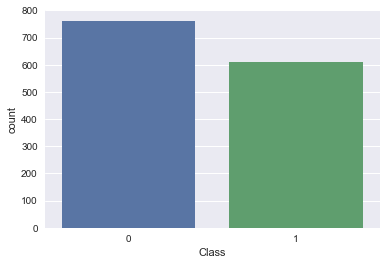

In [10]:
sns.countplot(data = data, x = 'Class')

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

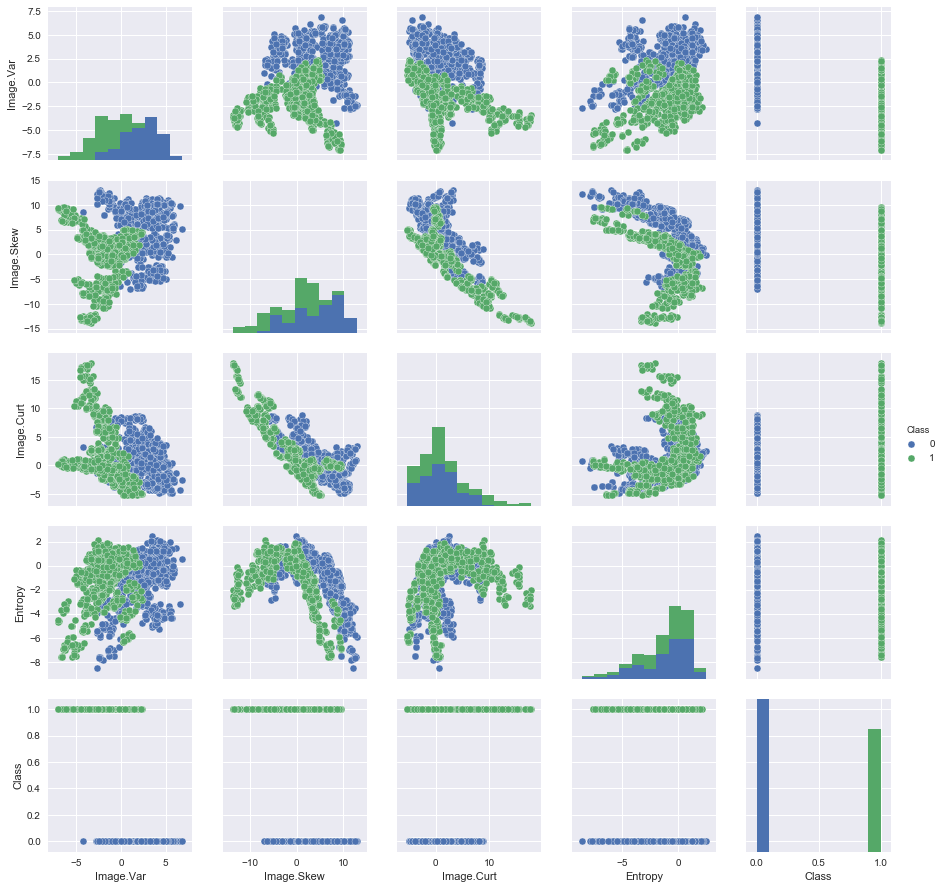

In [11]:
sns.pairplot(data = data, hue = 'Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** 

In [12]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [13]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [33]:
scaler.fit(data.drop('Class', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [16]:
scaled_features = scaler.fit_transform(data.drop('Class', axis = 1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [18]:
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [34]:
X = df_feat

In [35]:
y = data['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [36]:
X = X.as_matrix()
y = y.as_matrix()

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [37]:
from sklearn.cross_validation import train_test_split

/Users/Carl/work/python_env/p3-uruz7/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [42]:
from tensorflow.contrib.learn.python import learn

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [44]:
feature_columns = learn.infer_real_valued_columns_from_input(X_train)

In [45]:
classifier = learn.DNNClassifier(hidden_units=[10,20,10], n_classes=3, feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x114076438>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/m1/bt6j8jfd0yn_t0nzdjxcldhm0000gn/T/tmpqd1awy5k'}


In [50]:
import tensorflow as tf 
def get_train_inputs():
    x = tf.constant(X_train)
    y = tf.constant(y_train)

    return x, y

classifier.fit(input_fn=get_train_inputs, steps=200)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/m1/bt6j8jfd0yn_t0nzdjxcldhm0000gn/T/tmpqd1awy5k/model.ckpt-200
INFO:tensorflow:Saving checkpoints for 201 into /var/folders/m1/bt6j8jfd0yn_t0nzdjxcldhm0000gn/T/tmpqd1awy5k/model.ckpt.
INFO:tensorflow:loss = 0.0147673, step = 201
INFO:tensorflow:global_step/sec: 578.951
INFO:tensorflow:loss = 0.00743804, step = 301 (0.174 sec)
INFO:tensorflow:Saving checkpoints for 400 into /var/folders/m1/bt6j8jfd0yn_t0nzdjxcldhm0000gn/T/tmpqd1awy5k/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00498693.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1140760f0>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x10b3860d0>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [51]:
def get_test_inputs():
    x = tf.constant(X_test)
    return x 

note_predictions = list(classifier.predict_classes (input_fn=get_test_inputs))

INFO:tensorflow:Restoring parameters from /var/folders/m1/bt6j8jfd0yn_t0nzdjxcldhm0000gn/T/tmpqd1awy5k/model.ckpt-400


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(confusion_matrix(y_test, note_predictions))

[[239   0]
 [  0 173]]


In [54]:
print(classification_report(y_test, note_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       239
          1       1.00      1.00      1.00       173

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=200)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
rfc_preds = rfc.predict(X_test)

In [61]:
print(confusion_matrix(y_test,rfc_preds))

[[237   2]
 [  1 172]]


In [62]:
print(classification_report(y_test,rfc_preds))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       239
          1       0.99      0.99      0.99       173

avg / total       0.99      0.99      0.99       412

